<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/polynomial_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values


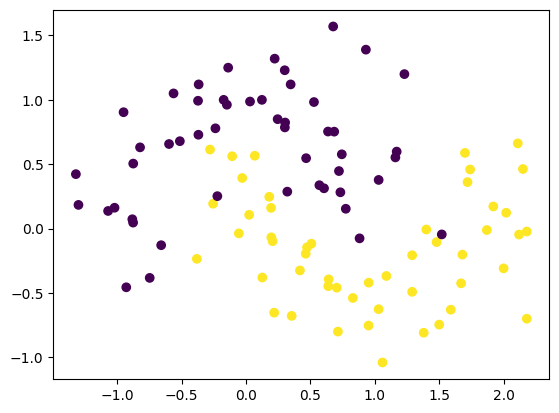

In [5]:
plt.scatter(X[:,0], X[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf=LogisticRegression()

In [8]:
clf.fit(X,y)

LogisticRegression()

In [9]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

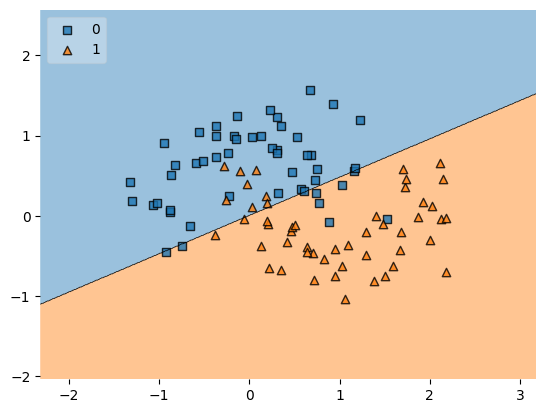

In [10]:
plot_decision_regions(X,y.astype('int'),clf, legend=2)

In [11]:
from sklearn.model_selection import cross_val_score


In [12]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

np.float64(0.8300000000000001)

**PolyMer Feature**

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly=PolynomialFeatures(degree=3 ,include_bias=False)

In [19]:
X_trf=poly.fit_transform(X)

In [20]:
lr=LogisticRegression()

In [22]:
np.mean(cross_val_score(lr,X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.9)

**Decision Boundary**

In [30]:
def plot_decision_boundary(X,y,degree=1):

  poly = PolynomialFeatures(degree=degree)
  X_trf = poly.fit_transform(X)

  clf = LogisticRegression()
  clf.fit(X_trf,y)

  accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

  XX,YY=np.meshgrid(a,b)

  input_array=np.array([XX.ravel(),YY.ravel()]).T

  labels=clf.predict(poly.transform(input_array))

  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1], c=y)
  plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))



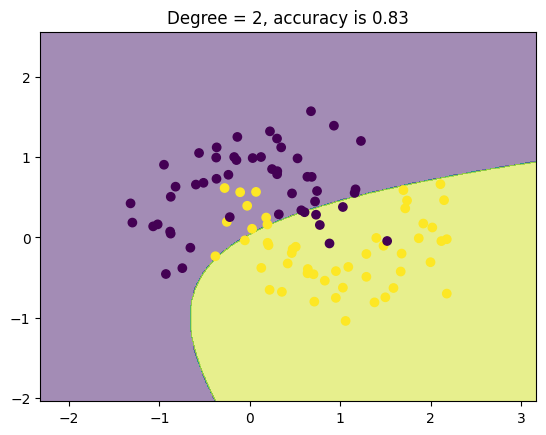

In [31]:
plot_decision_boundary(X,y,2)

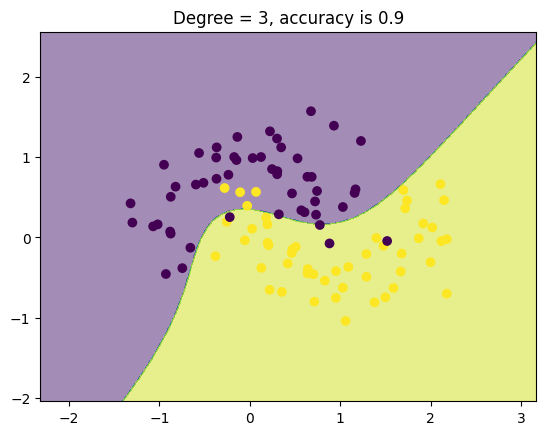

In [32]:
plot_decision_boundary(X,y,3)

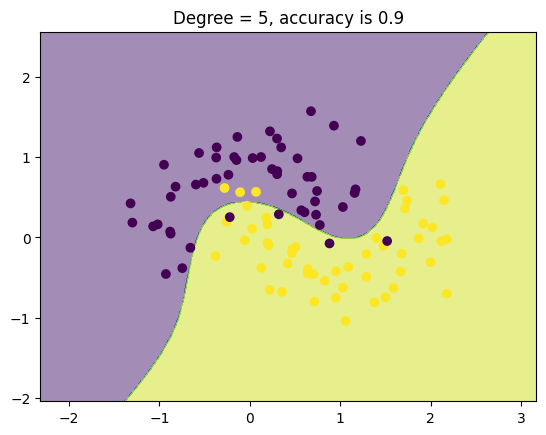

In [33]:
plot_decision_boundary(X,y,5)